In [102]:
from sklearn.datasets import load_breast_cancer

In [103]:
breast_cancer = load_breast_cancer()

In [104]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [105]:
breast_cancer.data.shape

(569, 30)

In [106]:
breast_cancer.target.shape

(569,)

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.2, random_state=42)

In [108]:
X_train.shape

(455, 30)

In [109]:
X_test.shape

(114, 30)

In [110]:
from sklearn.naive_bayes import GaussianNB

In [111]:
nb = GaussianNB()

In [112]:
nb.fit(X=X_train, y=y_train)

GaussianNB()

In [113]:
predicted = nb.predict(X=X_test)

In [114]:
expected = y_test

In [115]:
predicted[:10]

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1])

In [116]:
expected[:10]

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1])

In [117]:
print(f'Accuracy: {nb.score(X=X_test, y=y_test):.2%}')

Accuracy: 97.37%


In [118]:
from sklearn.metrics import confusion_matrix

In [119]:
confusion = confusion_matrix(y_true=expected, y_pred=predicted)

In [120]:
print(confusion)

[[40  3]
 [ 0 71]]


In [121]:
from sklearn.metrics import classification_report

In [122]:
names = [string for string in breast_cancer.target_names]

In [123]:
classification = classification_report(y_true=expected, y_pred=predicted, target_names=names)

In [124]:
print(classification)

              precision    recall  f1-score   support

   malignant       1.00      0.93      0.96        43
      benign       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [125]:
import pandas as pd

In [126]:
confusion_df = pd.DataFrame(confusion, index=range(2), columns=range(2))

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

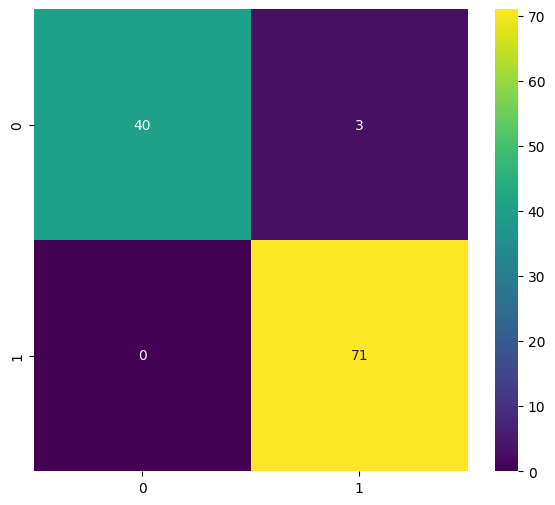

In [128]:
figure = plt.figure(figsize=(7, 6))
axes = sns.heatmap(confusion_df, annot=True, cmap=plt.cm.viridis)
plt.show()

In [129]:
from sklearn.model_selection import KFold

In [130]:
kfold = KFold(n_splits=10, random_state=42, shuffle=True)

In [131]:
from sklearn.model_selection import cross_val_score

In [132]:
scores = cross_val_score(estimator=nb, X=breast_cancer.data, y=breast_cancer.target, cv=kfold)

In [133]:
print(scores)

[0.98245614 0.96491228 0.87719298 0.96491228 0.92982456 0.96491228
 0.92982456 0.92982456 0.94736842 0.89285714]


In [134]:
print(f'Mean Accuracy: {scores.mean():.2%}')

Mean Accuracy: 93.84%


In [135]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [136]:
estimators = {
    'GaussianNB': nb,
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=10000),
    'SVC': SVC(gamma='scale')}

In [137]:
for estimator_name, estimator_object in estimators.items():
  kfold = KFold(n_splits=10, random_state=42, shuffle=True)
  scores = cross_val_score(estimator=estimator_object, X=breast_cancer.data, y=breast_cancer.target, cv=kfold)
  print(f'{estimator_name:>20}: ' + f'mean accuracy={scores.mean():.2%}; ' + f'standard deviation={scores.std():.2%}')

          GaussianNB: mean accuracy=93.84%; standard deviation=3.19%
KNeighborsClassifier: mean accuracy=93.67%; standard deviation=3.55%
  LogisticRegression: mean accuracy=94.90%; standard deviation=2.68%
                 SVC: mean accuracy=91.73%; standard deviation=4.39%
